<a href="https://colab.research.google.com/github/AnnJer/Practice_in_Data_Preprocessing/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from subprocess import check_output
print(check_output(["ls", "/home/ann/python/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv"]).decode("utf8"))
%matplotlib inline

/home/ann/python/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv



In [0]:
data = pd.read_csv("/home/ann/python/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")
print(plt.style.available)
plt.style.use('ggplot')

['seaborn-pastel', 'seaborn-whitegrid', '_classic_test', 'seaborn-deep', 'seaborn-poster', 'ggplot', 'seaborn-bright', 'seaborn-talk', 'seaborn-ticks', 'classic', 'seaborn-white', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'fivethirtyeight', 'grayscale', 'seaborn-notebook', 'bmh', 'seaborn-paper', 'dark_background', 'seaborn-muted', 'seaborn-colorblind', 'seaborn']


In [0]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [0]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


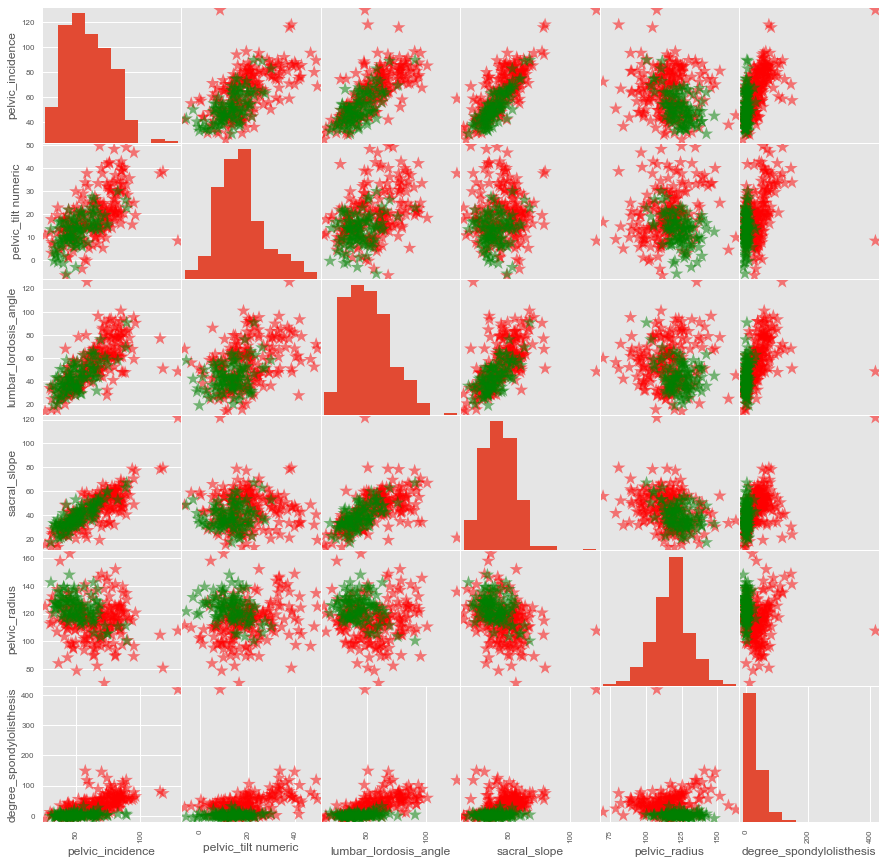

In [0]:

color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'], 
                                        c = color_list, 
                                        figsize = (15, 15), 
                                        diagonal = 'hist', 
                                        alpha = 0.5, 
                                       s = 200, 
                                       marker = '*')
plt.show()

Abnormal    210
Normal      100
Name: class, dtype: int64

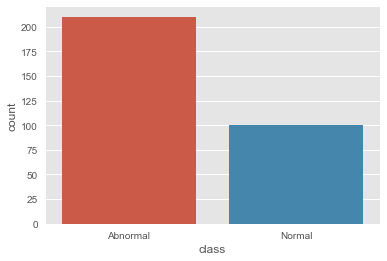

In [0]:
sns.countplot(x = "class", data = data)
data.loc[:, "class"].value_counts()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x, y = data.loc[:, data.columns != 'class'], data.loc[:, 'class']
knn.fit(x, y)
prediction = knn.predict(x)
print("Prediction {}".format(prediction))

Prediction ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abn

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
knn = KNeighborsClassifier(n_neighbors=3)
x, y = data.loc[:, data.columns != 'class'], data.loc[:, 'class']
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("WIth KNN (k=3) prediction is", knn.score(x_test, y_test))

WIth KNN (k=3) prediction is 0.860215053763


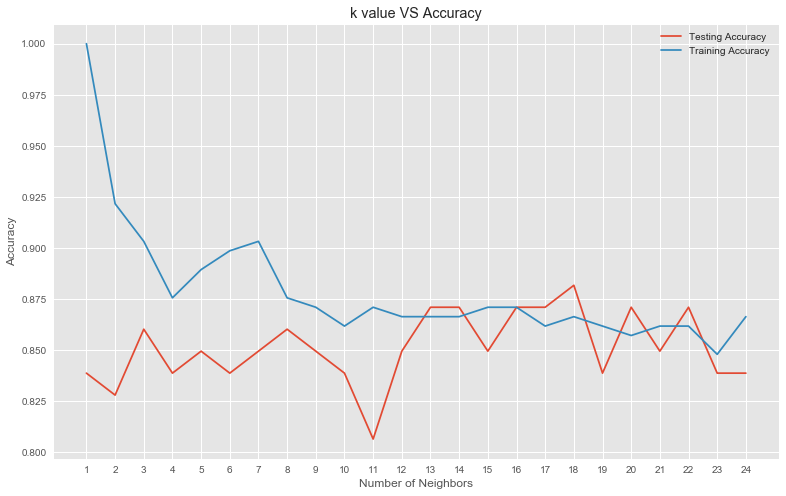

Best accuracy is 0.8817204301075269 with K = 18


In [0]:
neig = np.arange(1, 25)
test_accuracy = []
train_accuracy  = []
for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    test_accuracy.append(knn.score(x_test, y_test))
    train_accuracy.append(knn.score(x_train, y_train))
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy), 1+ test_accuracy.index(np.max(test_accuracy
                                                                                                 ))))

In [0]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("Best score is {}".format(knn.score(x_test, y_test)))

Best score is 0.8817204301075269


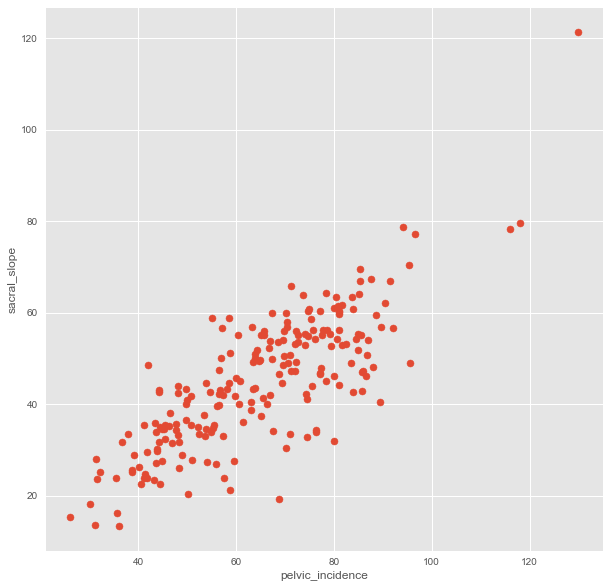

In [0]:
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score 0.6458410481075871


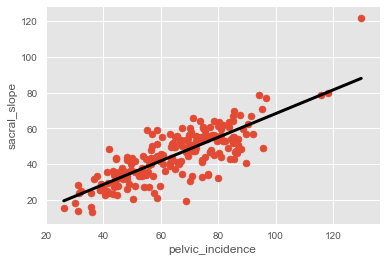

In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
reg.fit(x, y)
predicted = reg.predict(predict_space)
print("R^2 score {}".format(reg.score(x, y)))

plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()


In [0]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k=5
cv_result = cross_val_score(reg, x, y, cv = k)
print("cv scores ", cv_result)
print("cv score average ", sum(cv_result)/k)

cv scores  [ 0.32924233  0.61683991  0.53117056  0.1954798   0.29299864]
cv score average  0.393146250288


In [0]:
from sklearn.linear_model import Ridge
x_train,x_test, y_train, y_test = train_test_split(x, y, random_state= 2, test_size=0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train, y_train)
ridge_predict= ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.560828791884


In [0]:
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:, ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle','pelvic_radius']])
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train, y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)


Lasso score:  0.964033480433
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x, y = data.loc[:, data.columns != 'class'], data.loc[:, 'class']
x_train,x_test, y_train, y_test = train_test_split(x, y, random_state= 1, test_size=0.3)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train, y_train)
rf_rediction = rf.predict(x_test)
